Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.integrate import odeint

sns.set(style='white')

red, blue = ["#990A0A", "#1F3587"]

Define the ODE functions for the ligand receptor model
$$
\begin{align} \\
\text{Inactive change rate }=&\frac{dX_m}{dt} = k_1\cdot a \cdot X_{m}^{*} - k_{-1}X_m \\
\text{Active change rate }=&\frac{dX_{m}^{*}}{dt} = k_{-1}X_m - k_1\cdot a \cdot X_{m}^{*} \\
\end{align}
$$

In [2]:
def inactive_ode(xm_inactive,xm_active,alpha,k1,k_1):
    return k1*alpha*xm_active - k_1*xm_inactive

def active_ode(xm_inactive,xm_active,alpha,k1,k_1):
    return k_1*xm_inactive - k1*alpha*xm_active



Define the constants

In [3]:
k1 = 1
k_1 = 10

# Different amounts of attractant concentration
a_concentrations = [1,10,50,100]

Run the simulation

In [4]:
total_time = np.array([])
data = np.array([[],[]]).reshape(0,2)
t = np.linspace(0,100,10000)
ic = np.array([0,100])
a_concentrations_list = []

for n,a in enumerate(a_concentrations):
    total_time = np.append(total_time, t+(100*n))
    data = np.append(data,odeint(lambda y, t: [inactive_ode(y[0],y[1],a,k1,k_1), active_ode(y[0],y[1],a,k1,k_1)], ic, t),axis=0)
    ic = data[-1,:]
    a_concentrations_list.extend([a]*10000)



Plot the results

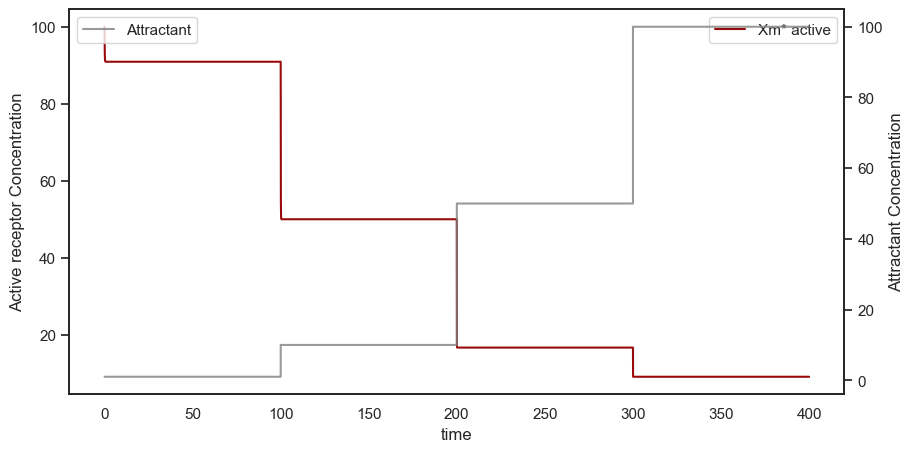

In [8]:
fig, ax1 = plt.subplots(figsize=(10,5))
#ax1.plot(total_time,data[:,0],color=blue,label="Xm inactive")
ax1.plot(total_time,data[:,1],color=red,label="Xm* active")
#ax1.plot(total_time,data[:,0],color=blue,label="Xm inactive")
ax1.set_xlabel("time")
ax1.set_ylabel("Active receptor Concentration")
ax1.legend()
#ax1.set_ylim(0,4)

ax2 = ax1.twinx()
ax2.plot(total_time,a_concentrations_list,color="gray",alpha=0.8,label="Attractant")
ax2.set_ylabel("Attractant Concentration")
ax2.legend()

Define the ODE functions for the ligand receptor model
$$
\begin{align} \\
\text{Inactive change rate}=&\frac{dX_m}{dt} = k_1\cdot a \cdot X_{m}^{*} - k_{-1}X_m +V_R\cdot R\\
\text{Active change rate}=&\frac{dX_{m}^{*}}{dt} = k_{-1}X_m - k_1\cdot a \cdot X_{m}^{*}+V_R\cdot R -K_B \cdot B \cdot X_{m}^{*}\\
\end{align}
$$

In [9]:
def inactive_ode(xm_inactive,xm_active,alpha,k1,k_1,vr,R,kb,B):
    return (k1*alpha*xm_active) - (k_1*xm_inactive) + (vr*R)

def active_ode(xm_inactive,xm_active,alpha,k1,k_1,vr,R,kb,B):
    return (k_1*xm_inactive) - (k1*alpha*xm_active) + (vr*R) - (kb*B*xm_active)



Define the constants

In [ ]:
k1 = 1
k_1 = 10
B = 5
R = 5
vr = 1
kb = 1

# Different amounts of attractant concentration
a_concentrations = [1,10,50]

Run the simulation

In [ ]:
total_time = np.array([])
data = np.array([[],[]]).reshape(0,2)
t = np.linspace(0,100,10000)
ic = np.array([0,100])
a_concentrations_list = []

for n,a in enumerate(a_concentrations):
    total_time = np.append(total_time, t+(100*n))
    data = np.append(
      data,odeint(lambda y, t: [
          inactive_ode(y[0],y[1],a,k1,k_1,vr,R,kb,B)
          , active_ode(y[0],y[1],a,k1,k_1,vr,R,kb,B)
          ], ic, t),axis=0
      )
    ic = data[-1,:]
    a_concentrations_list.extend([a]*10000)



Plot the results

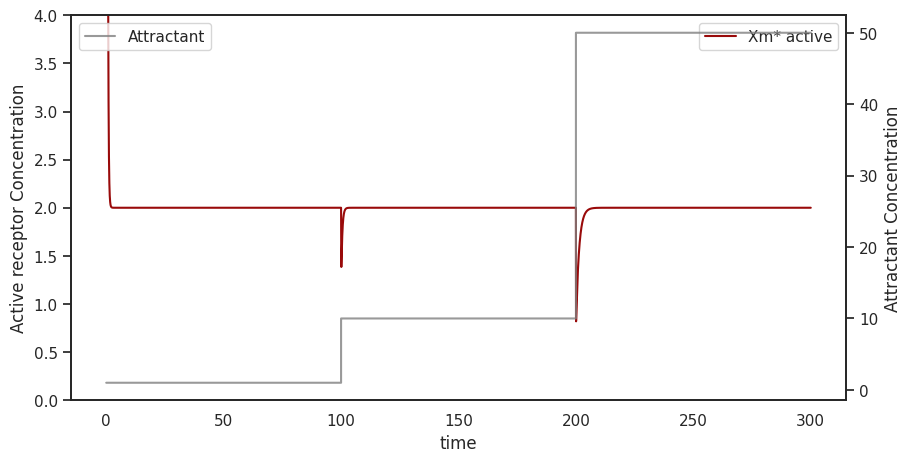

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))
#ax1.plot(total_time,data[:,0],color=blue,label="Xm inactive")
ax1.plot(total_time,data[:,1],color=red,label="Xm* active")
ax1.set_xlabel("time")
ax1.set_ylabel("Active receptor Concentration")
ax1.legend()
ax1.set_ylim(0,4)

ax2 = ax1.twinx()
ax2.plot(total_time,a_concentrations_list,color="gray",alpha=0.8,label="Attractant")
ax2.set_ylabel("Attractant Concentration")
ax2.legend()